In [9]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [15]:
# Lets Load Datasets
df=pd.read_csv("/content/2-wheeler-EV-bikewale.csv")
df

,review,Used it for,Owned for,Ridden for,rating,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,Comfort,Maintenance cost,Value for Money,Model Name
0,We all checked the bike's capacity to be 150 k...,Daily Commute,Never owned,NaN,1,3.0,4.0,NaN,NaN,NaN,4.0,NaN,1.0,TVS iQube
1,Performance is very poor on this bike. The cha...,Everything,> 1 yr,< 5000 kms,1,3.0,1.0,NaN,1.0,NaN,3.0,NaN,3.0,TVS iQube
2,I purchased this in April 2022 and the sales s...,Daily Commute,< 3 months,< 5000 kms,3,4.0,4.0,NaN,2.0,NaN,5.0,NaN,2.0,TVS iQube
3,If any issues come in scooty parts not availab...,Daily Commute,6 months-1 yr,5000-10000 kms,1,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,TVS iQube
4,Don't buy this vehicle unless you have a near ...,Daily Commute,6 months-1 yr,< 5000 kms,1,3.0,4.0,NaN,1.0,NaN,3.0,NaN,2.0,TVS iQube
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839,Scooty is ok but 250 motor power is less. So t...,Daily Commute,> 1 yr,< 5000 kms,2,2.0,2.0,NaN,2.0,NaN,2.0,NaN,3.0,Gemopai Ryder
840,"Superb scooty. good look, Many color options ....",Everything,< 3 months,< 5000 kms,5,5.0,5.0,5.0,5.0,5.0,NaN,5.0,NaN,Gemopai Ryder
841,"Up to 2 years the condition was good,\nAfter 2...",Daily Commute,> 1 yr,5000-10000 kms,2,2.0,2.0,4.0,2.0,3.0,NaN,1.0,NaN,Gemopai Ryder
842,"Compare to other scooters it is a best bike, c...",Daily Commute,3-6 months,< 5000 kms,5,4.0,4.0,NaN,NaN,NaN,4.0,NaN,5.0,Gemopai Ryder


In [16]:
df.head()

,review,Used it for,Owned for,Ridden for,rating,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,Comfort,Maintenance cost,Value for Money,Model Name
0,We all checked the bike's capacity to be 150 k...,Daily Commute,Never owned,NaN,1,3.0,4.0,NaN,NaN,NaN,4.0,NaN,1.0,TVS iQube
1,Performance is very poor on this bike. The cha...,Everything,> 1 yr,< 5000 kms,1,3.0,1.0,NaN,1.0,NaN,3.0,NaN,3.0,TVS iQube
2,I purchased this in April 2022 and the sales s...,Daily Commute,< 3 months,< 5000 kms,3,4.0,4.0,NaN,2.0,NaN,5.0,NaN,2.0,TVS iQube
3,If any issues come in scooty parts not availab...,Daily Commute,6 months-1 yr,5000-10000 kms,1,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,TVS iQube
4,Don't buy this vehicle unless you have a near ...,Daily Commute,6 months-1 yr,< 5000 kms,1,3.0,4.0,NaN,1.0,NaN,3.0,NaN,2.0,TVS iQube


In [17]:
# Drop any irrelevant columns (if needed)
df = df.drop(columns=['review', 'Used it for', 'Performance', 'Model Name','Maintenance cost','Extra Features'])

In [18]:
df.isnull().sum()  # Check for null values in each column
df.dropna(inplace=True)  # Drop rows with any null values
df.reset_index(drop=True, inplace=True)  # Reset the index after dropping rows
df.head()  # Display the first few rows of the cleaned data


,Owned for,Ridden for,rating,Visual Appeal,Reliability,Service Experience,Comfort,Value for Money
0,> 1 yr,< 5000 kms,1,3.0,1.0,1.0,3.0,3.0
1,< 3 months,< 5000 kms,3,4.0,4.0,2.0,5.0,2.0
2,6 months-1 yr,5000-10000 kms,1,1.0,1.0,1.0,1.0,1.0
3,6 months-1 yr,< 5000 kms,1,3.0,4.0,1.0,3.0,2.0
4,> 1 yr,5000-10000 kms,1,5.0,1.0,1.0,5.0,2.0


In [19]:
# Check for missing values and handle them if necessary
print(df.isnull().sum())

Owned for             0
Ridden for            0
rating                0
Visual Appeal         0
Reliability           0
Service Experience    0
Comfort               0
Value for Money       0
dtype: int64


In [21]:
# Drop the non-numeric columns
df = df.select_dtypes(include=["number"])

In [22]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [23]:
# Perform KMeans clustering on scaled data
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_data)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [24]:
# Add cluster labels to the DataFrame
df['Cluster'] = kmeans.labels_

In [25]:
# Analyze cluster characteristics
cluster_means = df.groupby('Cluster').mean()
print(cluster_means)

           rating  Visual Appeal  Reliability  Service Experience   Comfort  \
Cluster                                                                       
0        4.772059       4.727941     4.647059            4.588235  4.639706   
1        1.073684       2.115789     1.168421            1.115789  1.684211   
2        3.064103       3.717949     2.961538            2.628205  3.461538   

         Value for Money  
Cluster                   
0               4.536765  
1               1.273684  
2               3.282051  


In [26]:
# Calculate Silhouette Score
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(scaled_data, kmeans.labels_)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.46327118563644737


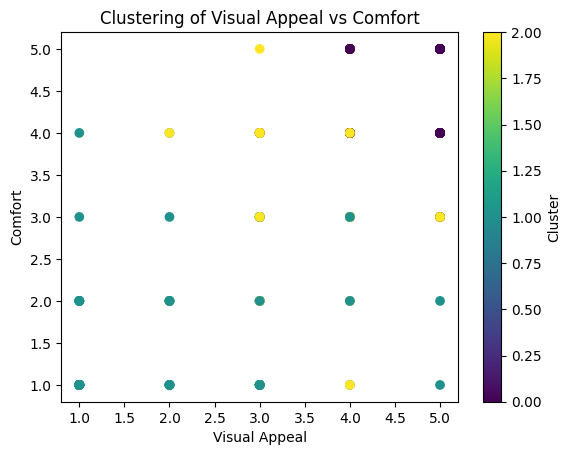

In [27]:
# Visualize the clusters
plt.scatter(df['Visual Appeal'], df['Comfort'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Visual Appeal')
plt.ylabel('Comfort')
plt.title('Clustering of Visual Appeal vs Comfort')
plt.colorbar(label='Cluster')
plt.show()

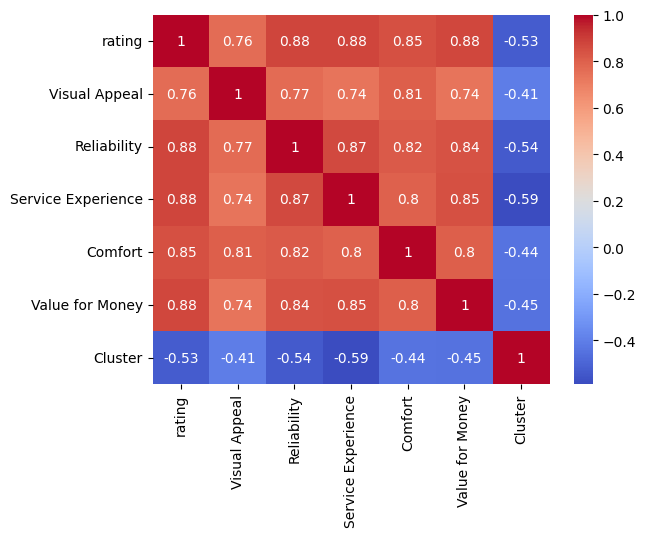

In [28]:
import seaborn as sns

# Create a heatmap of the correlation matrix
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()
